In [1]:
import pandas as pd

train = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\train.csv")
val = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\val.csv")   # or dev.csv
test = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\test.csv")

df = pd.concat([train, val, test], axis=0).reset_index(drop=True)

print(df.shape)
df.head()


(211225, 37)


,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd

emotion_columns = [
    'anger', 'disgust', 'fear',
    'joy', 'sadness', 'surprise', 'neutral'
]

label_map = {
    'anger': 0,       # angry
    'disgust': 1,
    'fear': 2,
    'joy': 3,         # happy
    'neutral': 4,
    'sadness': 5,    # sad
    'surprise': 6
}


def convert_to_single_label(df):
    labels = []

    for _, row in df.iterrows():
        active = [emo for emo in emotion_columns if row[emo] == 1]

        if len(active) == 1:
            labels.append(label_map[active[0]])
        elif len(active) > 1:
            # pick first emotion consistently
            labels.append(label_map[active[0]])
        else:
            labels.append(None)

    df['label'] = labels
    df = df.dropna(subset=['label'])
    df['label'] = df['label'].astype(int)

    return df[['text', 'label']]


In [ ]:
train_df = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\train.csv")
val_df   = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\val.csv")
test_df  = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\test.csv")

train_df = convert_to_single_label(train_df)
val_df   = convert_to_single_label(val_df)
test_df  = convert_to_single_label(test_df)



C:\Users\sk computers\AppData\Local\Temp\ipykernel_15668\713250553.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)
C:\Users\sk computers\AppData\Local\Temp\ipykernel_15668\713250553.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


Train: (29916, 2)
Val: (30021, 2)
Test: (30761, 2)


C:\Users\sk computers\AppData\Local\Temp\ipykernel_15668\713250553.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype(int)


In [8]:
print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)

Train: (29916, 2)
Val: (30021, 2)
Test: (30761, 2)


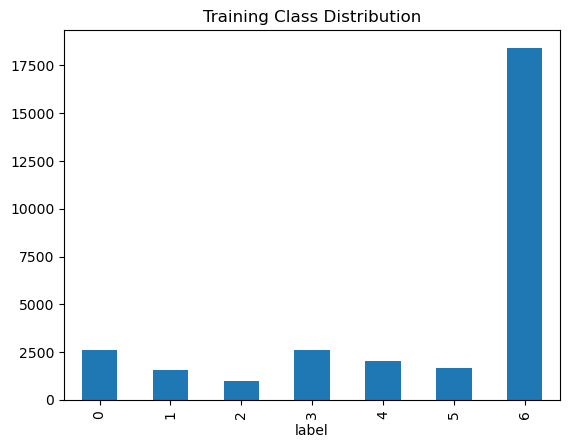

In [9]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().sort_index().plot(kind='bar')
plt.title("Training Class Distribution")
plt.show()


In [11]:
emotion_cols = [
    'anger', 'disgust', 'fear', 'joy',
    'neutral', 'sadness', 'surprise'
]


In [12]:
import pandas as pd

def get_single_label(row):
    for emo in emotion_cols:
        if row[emo] == 1:
            return emo
    return None

df['emotion'] = df.apply(get_single_label, axis=1)
df = df.dropna(subset=['emotion'])


In [13]:
label_map = {
    'anger': 0,       # angry
    'disgust': 1,
    'fear': 2,
    'joy': 3,         # happy
    'neutral': 4,
    'sadness': 5,    # sad
    'surprise': 6
}

df['label'] = df['emotion'].map(label_map)


C:\Users\sk computers\AppData\Local\Temp\ipykernel_15668\2493706031.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['emotion'].map(label_map)


In [14]:
class_counts = df['label'].value_counts().sort_index()
print(class_counts)


label
0     8084
1     4891
2     3056
3     7921
4    55298
5     6285
6     5163
Name: count, dtype: int64


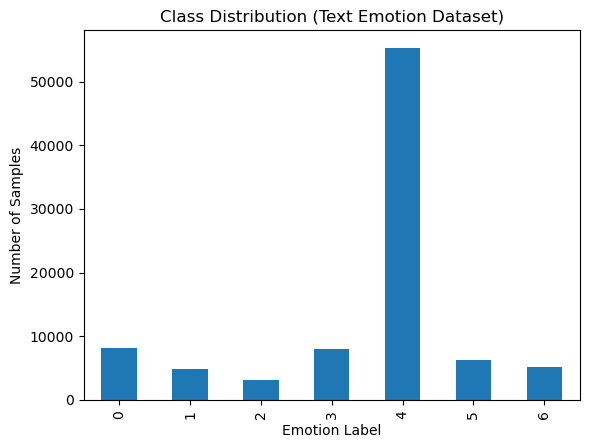

In [15]:
import matplotlib.pyplot as plt

class_counts.plot(kind='bar')
plt.xlabel("Emotion Label")
plt.ylabel("Number of Samples")
plt.title("Class Distribution (Text Emotion Dataset)")
plt.show()


In [16]:
import pandas as pd
import numpy as np


In [17]:
# Load datasets
train_df = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\train.csv")
val_df   = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\val.csv")
test_df  = pd.read_csv(r"F:\Multimodal_Emotion_Detection\data\text\test.csv")


In [18]:
emotion_map = {
    "anger": "angry",
    "disgust": "disgust",
    "fear": "fear",
    "joy": "happy",
    "sadness": "sad",
    "surprise": "surprise",
    "neutral": "neutral"
}


In [19]:
EMOTION_COLUMNS = list(emotion_map.keys())


In [20]:
def extract_single_label(df):
    labels = []
    texts = []

    for _, row in df.iterrows():
        active_emotions = [e for e in EMOTION_COLUMNS if row[e] == 1]

        if len(active_emotions) == 1:
            labels.append(emotion_map[active_emotions[0]])
            texts.append(row["text"])

    return pd.DataFrame({"text": texts, "label": labels})


In [21]:
train_clean = extract_single_label(train_df)
val_clean   = extract_single_label(val_df)
test_clean  = extract_single_label(test_df)


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_clean["label_id"] = le.fit_transform(train_clean["label"])
val_clean["label_id"]   = le.transform(val_clean["label"])
test_clean["label_id"]  = le.transform(test_clean["label"])


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [24]:
tfidf = TfidfVectorizer(
    max_features=30000,
    ngram_range=(1, 2),
    stop_words="english"
)


In [25]:
X_train = tfidf.fit_transform(train_clean["text"])
X_val   = tfidf.transform(val_clean["text"])
X_test  = tfidf.transform(test_clean["text"])

y_train = train_clean["label_id"]
y_val   = val_clean["label_id"]
y_test  = test_clean["label_id"]


In [26]:
from sklearn.utils.class_weight import compute_class_weight


In [27]:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)


{0: np.float64(1.7619844590555889), 1: np.float64(2.8243748203506756), 2: np.float64(4.552586872586873), 3: np.float64(1.6710884353741497), 4: np.float64(0.22858073371019144), 5: np.float64(2.0663115098836395), 6: np.float64(2.490326940947875)}
{0: np.float64(1.7619844590555889), 1: np.float64(2.8243748203506756), 2: np.float64(4.552586872586873), 3: np.float64(1.6710884353741497), 4: np.float64(0.22858073371019144), 5: np.float64(2.0663115098836395), 6: np.float64(2.490326940947875)}


In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
model = LogisticRegression(
    max_iter=1000,
    class_weight=class_weight_dict,
    n_jobs=-1
)


In [30]:
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,"{0: np.float64(1.7619844590555889), 1: np.float64(2.8243748203506756), 2: np.float64(4.552586872586873), 3: np.float64(1.6710884353741497), ...}"
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [31]:
from sklearn.metrics import classification_report, accuracy_score


In [32]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.6022044749521483
              precision    recall  f1-score   support

       angry       0.38      0.52      0.44      2539
     disgust       0.30      0.42      0.35      1628
        fear       0.39      0.57      0.47       956
       happy       0.49      0.71      0.58      2635
     neutral       0.84      0.62      0.71     18616
         sad       0.43      0.58      0.49      2157
    surprise       0.39      0.58      0.47      1771

    accuracy                           0.60     30302
   macro avg       0.46      0.57      0.50     30302
weighted avg       0.67      0.60      0.62     30302



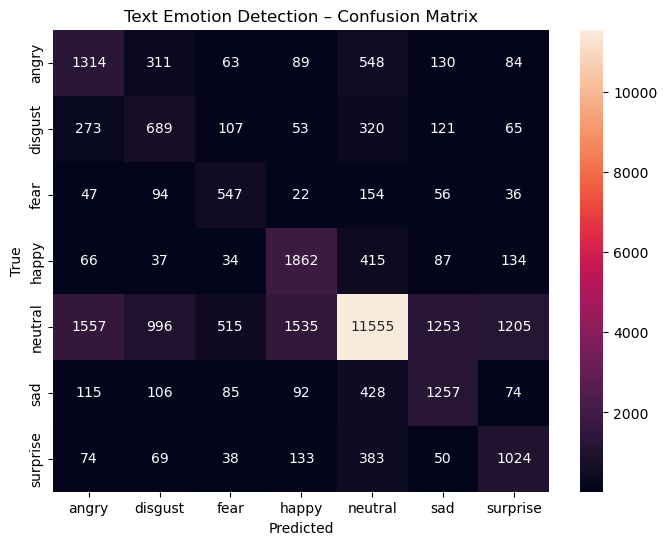

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Text Emotion Detection – Confusion Matrix")
plt.show()


In [44]:
custom_sentences = [
    "I feel completely broken and hopeless",
    "This is the happiest day of my life",
    "I am so angry right now",
    "I feel calm and nothing special",
    "That was disgusting and horrible",
    "I'm scared about what will happen next"
]

custom_tfidf = tfidf.transform(custom_sentences)
custom_preds = model.predict(custom_tfidf)

for sent, pred in zip(custom_sentences, custom_preds):
    print(f"{sent} → {le.inverse_transform([pred])[0]}")


I feel completely broken and hopeless → sad
This is the happiest day of my life → happy
I am so angry right now → angry
I feel calm and nothing special → neutral
That was disgusting and horrible → disgust
I'm scared about what will happen next → fear


In [45]:
import joblib


In [46]:
joblib.dump(model, "text_emotion_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']